# Základy práce s Python v Google API - Vision
Python lze použít jako základní scriptovací jazyk, nebo jako silný programovací jazyk s objekty a vlasními knohovnami. V tomto cvičení budeme využívat ukázek spouštěšní scriptů v prostředí jupyter, které umožňuje interaktivní práci s jazykem Python. Detaily na (https://jupyter.org/).

Příkazy se zpracovávají jeden po druhém, symbol ukončení je konec řádku, vnitřní blok se odděluje tabulátorem

# Google API a instalace knihoven
Klíčové knihovny, které budeme používat pro práci s google api jsou k dispozici v rámci instalačních balíků pomocí pip (https://pip.pypa.io/en/stable/) nebo přes nástroj Anaconda (https://www.anaconda.com/) (již máte nainsotalované na vašich virtuálních strojích). Konkrétní knihovny, které budeme potřebovat jsou nálsedující:
- `google-cloud-language` pro analýzu jazyka
- `google-cloud-vision` pro analýzu pbrazu
- `google-cloud` zastřešující balík, pokud nechcete načítat jednotlivé balíky 
- `google-oauth` pro zajištění snadné autentizace

Je důležité vědět, jak si potřebné knihovny do Python nainstalovat. K tomu slouží příkaz

```pip install --user --upgrade google-cloud-language google-cloud google-cloud-vision google-oauth matplotlib ipython```,

který spusťte v příkazové řádce (Windows => Start => Command prompt)

Základem jazyka Python je práce s knihovnami a kontrola, že vše je správně nainstalované. Načtení knihovan a ověření provedeme pomocí následujícího příkazu:

In [1]:
from google.cloud import vision
from google.oauth2 import service_account

V případě, že se vám povedlo předchozí příkazy spustit bez chybových hlášek, je vše korektně nainstalováno a je možné začít pracovat s Google API. Než k tomu přistoupíme, bude potřeba ještě nahrát knihovny pro práci s obrázky

In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io

Dalším kontrolním bodem je schopnost přihlásit se k vašemu účtu z Python, k tomu slouží následující příkazy. Je potřeba začít s tím, aby jste již vygenerovaný soubor s přihlašovacími údaji zpřístupnili pythony:

In [3]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [4]:
client = vision.ImageAnnotatorClient(credentials=creds)

Začneme jednoduchým testem funkčnosti API na jednom obrázku, odkaz na název dejme do proměnné:

In [7]:
soubor = './data/tym1/110000.jpg'

Načteme obrázek ze souboru:

In [8]:
with io.open(soubor, 'rb') as image_file:
    content = image_file.read()

Předáme obrázek do Google knihovny ```vision```:

In [9]:
image = vision.Image(content = content)

Nyní můžeme odeslat obrázek ke zpracování pomocí Google API a získat popis obrázku pomocí funkce ```label_detection```. Detail k funkci najdete na následujících stránkách (https://googleapis.dev/python/vision/latest/vision_v1/services.html).

In [13]:
response = client.label_detection(image = image)
type(response)

google.cloud.vision_v1.types.image_annotator.AnnotateImageResponse

Výstup je k dispozici v pomocí funkce ```label_annotations```

In [15]:
labels = response.label_annotations
type(labels)
print(labels)

[mid: "/m/0838f"
description: "Water"
score: 0.9618131
topicality: 0.9618131
, mid: "/m/0dx1j"
description: "Town"
score: 0.94295615
topicality: 0.94295615
, mid: "/m/0cgh4"
description: "Building"
score: 0.9355185
topicality: 0.9355185
, mid: "/m/03jm5"
description: "House"
score: 0.88523763
topicality: 0.88523763
, mid: "/m/05t0z3q"
description: "Bank"
score: 0.8767913
topicality: 0.8767913
, mid: "/m/04h4w"
description: "Lake"
score: 0.8206339
topicality: 0.8206339
, mid: "/m/03h5wy"
description: "Channel"
score: 0.8195773
topicality: 0.8195773
, mid: "/m/0csh5"
description: "Cumulus"
score: 0.77680254
topicality: 0.77680254
, mid: "/m/06hyd"
description: "Roof"
score: 0.76950437
topicality: 0.76950437
, mid: "/m/040h04"
description: "Hill station"
score: 0.75565475
topicality: 0.75565475
]


Než si projdeme popisky obrázku vrácené funkcí Google API, podívejme se na obrázek.

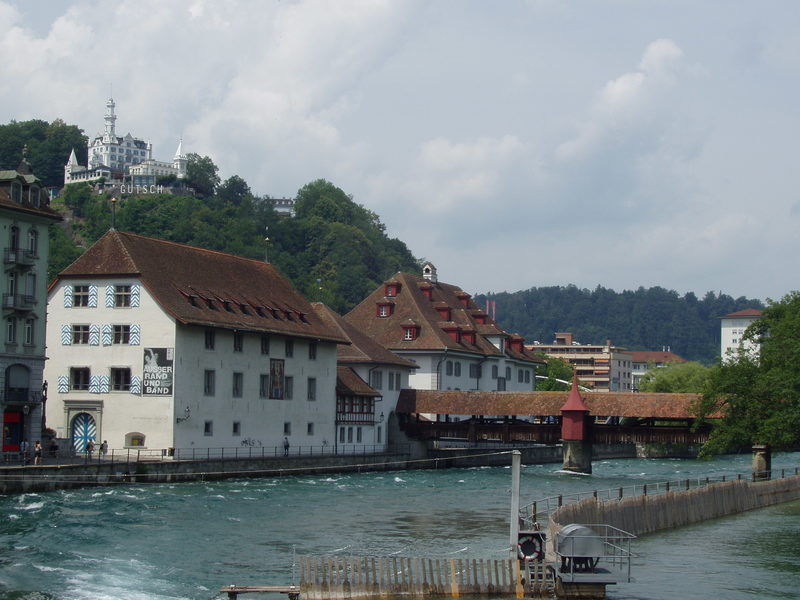

In [12]:
Image(soubor)

Nyní se podívejme, jaké ```Labels``` nám Google API vrátil:

In [16]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Water
Town
Building
House
Bank
Lake
Channel
Cumulus
Roof
Hill station


# Nyní trocha automatizace
projdeme všechny soubory v adresáři a provedeme analýzu na nich:

In [28]:
import os

In [29]:
path = './data/tym3'

In [30]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [31]:
labels_images = {}

In [32]:
directories = os.listdir(path)

In [39]:
print(directories)

['102400.jpg', '104901.jpg', '106902.jpg', '110801.jpg', '111101.jpg', '115300.jpg', '118202.jpg', '118300.jpg', '118303.jpg', '121402.jpg', '126801.jpg', '136600.jpg', '138705.jpg', '142300.jpg', '142800.jpg']


In [54]:
for i in directories:
    if i.endswith('.jpg'):
        lbls = get_labels(os.path.join(path, i))
        lbl_set = [i.description for i in lbls]
        labels_images[os.path.join(path, i)] = lbl_set

In [55]:
print(labels_images)

{'./data/tym3\\102400.jpg': ['Vegetation', 'Mountainous landforms', 'Natural landscape', 'Plant community', 'Highland', 'Mountain range', 'Mountain', 'Hill', 'Nature reserve', 'Hill station'], './data/tym3\\104901.jpg': ['Tree', 'Woody plant', 'Trunk', 'Thatching', 'Shade', 'Gazebo', 'Tent', 'Arecales', 'Grove', 'Outdoor structure'], './data/tym3\\106902.jpg': ['Underwater', 'Organism', 'Fluid', 'Natural environment', 'Coral reef', 'Coral', 'Cnidaria', 'Sea anemone', 'Algae', 'Stony coral'], './data/tym3\\110801.jpg': ['Plant', 'Petal', 'Flower', 'Plant community', 'Leaf', 'Purple', 'Shrub', 'Botany', 'Violet', 'Flowering plant'], './data/tym3\\111101.jpg': ['Window', 'Facade', 'Fixture', 'Material property', 'Sash window', 'Balcony', 'Window covering'], './data/tym3\\115300.jpg': ['Natural environment', 'Landscape', 'Sand', 'Plain', 'Ecoregion', 'Aeolian landform', 'Soil', 'Geology', 'Desert'], './data/tym3\\118202.jpg': ['Plant community', 'Rock', 'Bedrock', 'Geology', 'Formation', '

In [56]:
print(labels_images['./data/tym3\\102400.jpg'])

['Vegetation', 'Mountainous landforms', 'Natural landscape', 'Plant community', 'Highland', 'Mountain range', 'Mountain', 'Hill', 'Nature reserve', 'Hill station']


In [57]:
tags = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags.get(j, [0, []])[0] + 1
        seznam = tags.get(j, [0, []])[1]
        seznam.append(k)
        tags[j] = [pocet, seznam]

In [62]:
print(tags['Geology'])


[3, ['./data/tym3\\115300.jpg', './data/tym3\\118202.jpg', './data/tym3\\136600.jpg']]


In [60]:
sort_tabs = sorted(tags.items(), key = lambda x: x[1], reverse = True)

In [64]:
print(sort_tabs[0])

('Geology', [3, ['./data/tym3\\115300.jpg', './data/tym3\\118202.jpg', './data/tym3\\136600.jpg']])


In [65]:
type(sort_tabs)

list

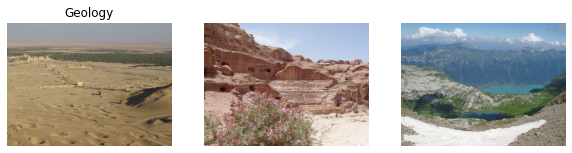

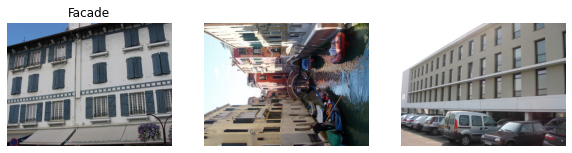

In [38]:
for k in range(3):
    pocet = sort_tabs[k][1][0]
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs[k][1][1][i]))
        ax[i].axis('off')

    plt.show()